In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=cidreira
Processing Record 1 of Set 1 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=grindavik
Processing Record 2 of Set 1 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=belushya+guba
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=dikson
Processing Record 4 of Set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=cochrane
Processing Record 5 of Set 1 | cochrane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=nemuro
Processing Record 6 of Set 1 | nem

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=fuerte+olimpo
Processing Record 4 of Set 2 | fuerte olimpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=kaitangata
Processing Record 5 of Set 2 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=banikoara
Processing Record 6 of Set 2 | banikoara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=bakchar
Processing Record 7 of Set 2 | bakchar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=gizo
Processing Record 8 of Set 2 | gizo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=avarua
Processing Record 9 of Set 2 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e5

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=palabuhanratu
Processing Record 10 of Set 3 | palabuhanratu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=hermanus
Processing Record 11 of Set 3 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=atar
Processing Record 12 of Set 3 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=severo-kurilsk
Processing Record 13 of Set 3 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=slave+lake
Processing Record 14 of Set 3 | slave lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=sorvag
Processing Record 15 of Set 3 | sorvag
City not found. Skipping...
http://api.o

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=waipawa
Processing Record 14 of Set 4 | waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=murbad
Processing Record 15 of Set 4 | murbad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=skegness
Processing Record 16 of Set 4 | skegness
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=ayagoz
Processing Record 17 of Set 4 | ayagoz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=narsaq
Processing Record 18 of Set 4 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=linjiang
Processing Record 19 of Set 4 | linjiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b9

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=hithadhoo
Processing Record 17 of Set 5 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=taurianova
Processing Record 18 of Set 5 | taurianova
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=sulangan
Processing Record 19 of Set 5 | sulangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=denau
Processing Record 20 of Set 5 | denau
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=pestretsy
Processing Record 21 of Set 5 | pestretsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=kyabram
Processing Record 22 of Set 5 | kyabram
http://api.openweathermap.org/data/2.5/weather?units=I

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=adrar
Processing Record 22 of Set 6 | adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=the+valley
Processing Record 23 of Set 6 | the valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=bengkulu
Processing Record 24 of Set 6 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=kattivakkam
Processing Record 25 of Set 6 | kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=yima
Processing Record 26 of Set 6 | yima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=lebu
Processing Record 27 of Set 6 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=sumbe
Processing Record 27 of Set 7 | sumbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=victoria
Processing Record 28 of Set 7 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=road+town
Processing Record 29 of Set 7 | road town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=rolim+de+moura
Processing Record 30 of Set 7 | rolim de moura
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=lethem
Processing Record 31 of Set 7 | lethem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=anantapur
Processing Record 32 of Set 7 | anantapur
http://api.openweathermap.org/data/2.5/weather?u

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=yanliang
Processing Record 32 of Set 8 | yanliang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=coolum+beach
Processing Record 33 of Set 8 | coolum beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=ponta+do+sol
Processing Record 34 of Set 8 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=vila+velha
Processing Record 35 of Set 8 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=yulara
Processing Record 36 of Set 8 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=hurricane
Processing Record 37 of Set 8 | hurricane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=vestmannaeyjar
Processing Record 34 of Set 9 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=hualmay
Processing Record 35 of Set 9 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=auki
Processing Record 36 of Set 9 | auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=kihei
Processing Record 37 of Set 9 | kihei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=kolyvan
Processing Record 38 of Set 9 | kolyvan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=buraydah
Processing Record 39 of Set 9 | buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=varhaug
Processing Record 37 of Set 10 | varhaug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=nangong
Processing Record 38 of Set 10 | nangong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=vardo
Processing Record 39 of Set 10 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=durban
Processing Record 40 of Set 10 | durban
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=kampot
Processing Record 41 of Set 10 | kampot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=los+altos
Processing Record 42 of Set 10 | los altos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=simao
Processing Record 40 of Set 11 | simao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=batagay-alyta
Processing Record 41 of Set 11 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=tame
Processing Record 42 of Set 11 | tame
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=kailua
Processing Record 43 of Set 11 | kailua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=san+luis
Processing Record 44 of Set 11 | san luis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=carevo
Processing Record 45 of Set 11 | carevo
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperia

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=micheweni
Processing Record 44 of Set 12 | micheweni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=bani
Processing Record 45 of Set 12 | bani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=vung+tau
Processing Record 46 of Set 12 | vung tau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=santa+maria
Processing Record 47 of Set 12 | santa maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=kirakira
Processing Record 48 of Set 12 | kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c&q=pasni
Processing Record 49 of Set 12 | pasni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5de

In [10]:
len(city_data)

553

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zelenoborsk,61.4669,64.0333,52.16,68,100,5.70,RU,2021-07-25 19:36:59
1,Husavik,66.0449,-17.3389,58.91,64,100,6.26,IS,2021-07-25 19:31:03
2,Mataura,-46.1927,168.8643,47.48,92,100,3.38,NZ,2021-07-25 19:30:25
3,Evensk,61.9500,159.2333,48.63,99,100,7.23,RU,2021-07-25 19:30:29
4,Mandalay,21.9747,96.0836,78.46,87,100,7.63,MM,2021-07-25 19:37:00
5,Murgab,37.4966,61.9714,91.27,31,0,9.22,TM,2021-07-25 19:32:03
6,Sale,34.0389,-6.8166,73.63,78,20,10.36,MA,2021-07-25 19:37:00
7,San Patricio,28.0170,-97.5169,95.09,42,0,13.87,US,2021-07-25 19:31:00
8,Busselton,-33.6500,115.3333,58.08,65,8,20.58,AU,2021-07-25 19:37:00
9,Hermanus,-34.4187,19.2345,62.91,53,100,9.73,ZA,2021-07-25 19:37:01


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zelenoborsk,RU,2021-07-25 19:36:59,61.4669,64.0333,52.16,68,100,5.70
1,Husavik,IS,2021-07-25 19:31:03,66.0449,-17.3389,58.91,64,100,6.26
2,Mataura,NZ,2021-07-25 19:30:25,-46.1927,168.8643,47.48,92,100,3.38
3,Evensk,RU,2021-07-25 19:30:29,61.9500,159.2333,48.63,99,100,7.23
4,Mandalay,MM,2021-07-25 19:37:00,21.9747,96.0836,78.46,87,100,7.63
5,Murgab,TM,2021-07-25 19:32:03,37.4966,61.9714,91.27,31,0,9.22
6,Sale,MA,2021-07-25 19:37:00,34.0389,-6.8166,73.63,78,20,10.36
7,San Patricio,US,2021-07-25 19:31:00,28.0170,-97.5169,95.09,42,0,13.87
8,Busselton,AU,2021-07-25 19:37:00,-33.6500,115.3333,58.08,65,8,20.58
9,Hermanus,ZA,2021-07-25 19:37:01,-34.4187,19.2345,62.91,53,100,9.73


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

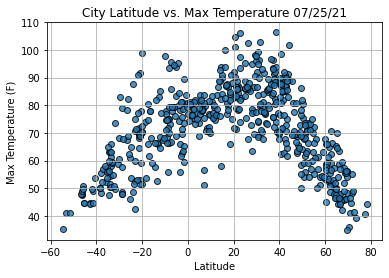

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

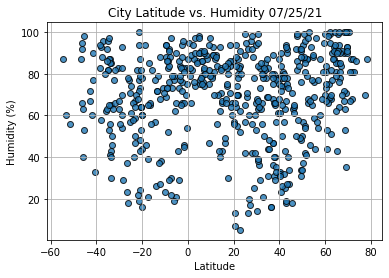

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

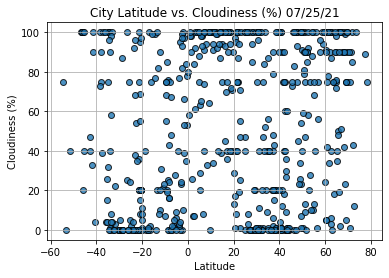

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

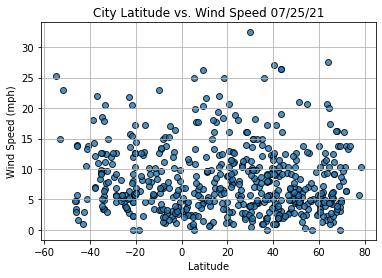

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
 #Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zelenoborsk,RU,2021-07-25 19:36:59,61.4669,64.0333,52.16,68,100,5.70
1,Husavik,IS,2021-07-25 19:31:03,66.0449,-17.3389,58.91,64,100,6.26
3,Evensk,RU,2021-07-25 19:30:29,61.9500,159.2333,48.63,99,100,7.23
4,Mandalay,MM,2021-07-25 19:37:00,21.9747,96.0836,78.46,87,100,7.63
5,Murgab,TM,2021-07-25 19:32:03,37.4966,61.9714,91.27,31,0,9.22


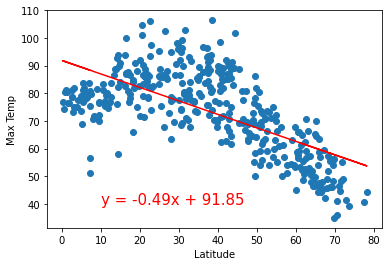

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

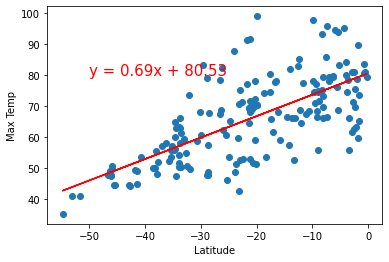

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

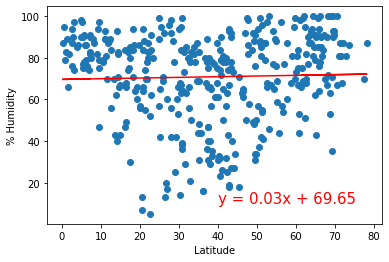

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

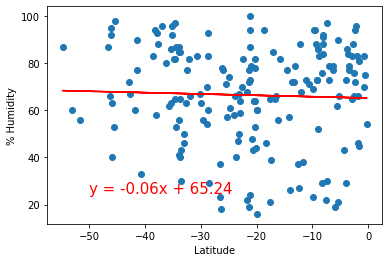

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))

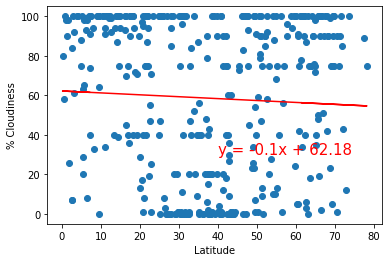

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40, 30))

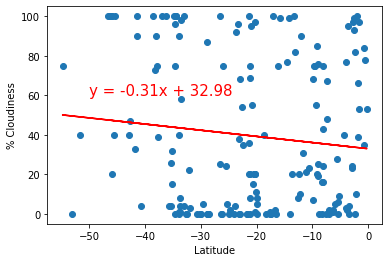

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

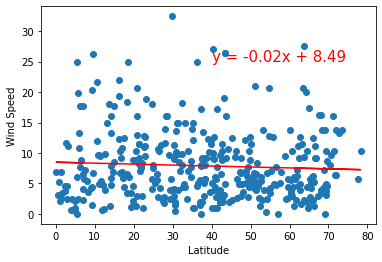

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

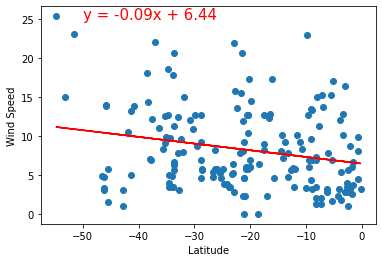

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))